In [1]:
import matplotlib.pyplot as plt
from src.competencies import (
    get_job_title_to_competencies_employee,
    get_job_title_to_competencies_boss,
    show_competencies,
)
from src.utilities import load_sav_data
from src.clustering import show_clusters_grouping_score, get_clusters, show_clusters

employee_sav_df, employee_sav_meta, boss_sav_df, boss_sav_meta = load_sav_data()

In [2]:
employees_to_competencies = get_job_title_to_competencies_employee(
    df=employee_sav_df,
    df_meta=employee_sav_meta,
    prefix=None,
    depth=1,
)

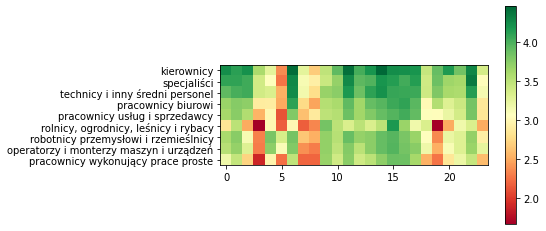

In [3]:
show_competencies(employees_to_competencies)

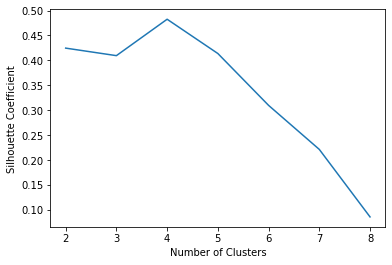

In [4]:
show_clusters_grouping_score(employees_to_competencies)

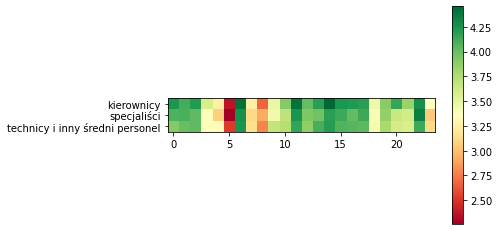

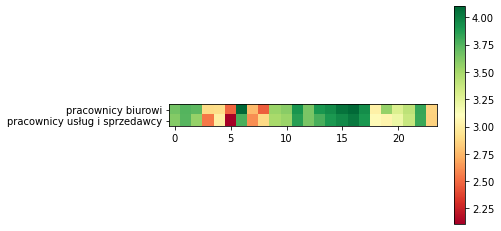

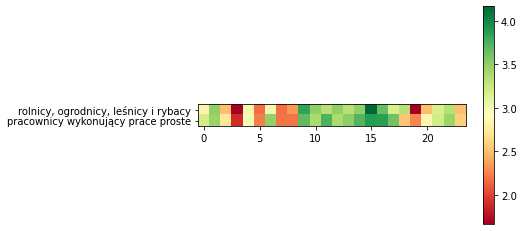

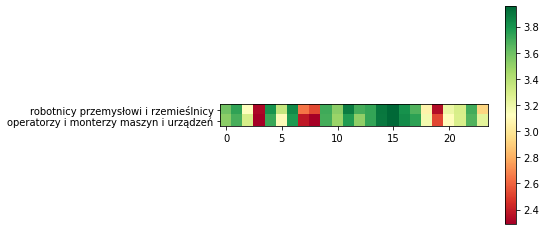

In [5]:
clustered_employees = get_clusters(4, employees_to_competencies)
show_clusters(clustered_employees)

In [6]:
boss_to_competencies = get_job_title_to_competencies_boss(
    df=boss_sav_df,
    df_meta=employee_sav_meta,
    prefix=None,
    depth=1,
)

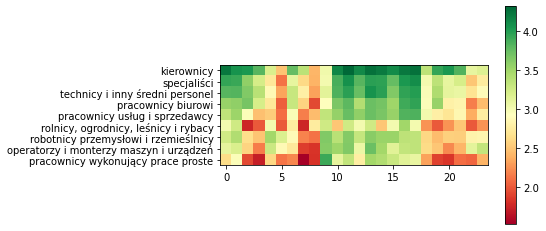

In [7]:
show_competencies(boss_to_competencies)

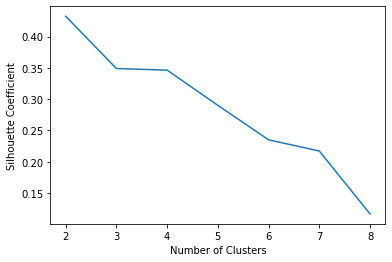

In [8]:
show_clusters_grouping_score(boss_to_competencies)

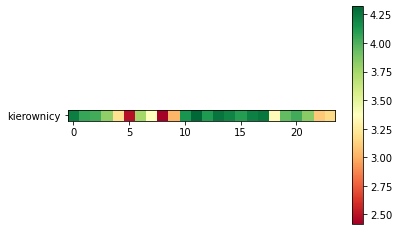

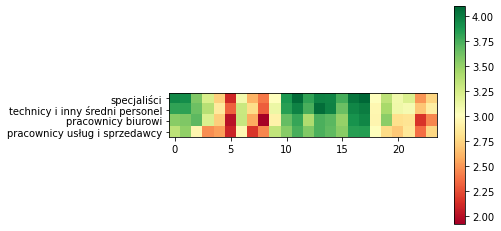

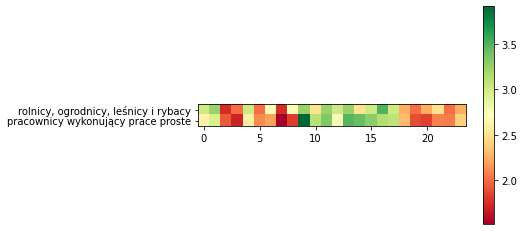

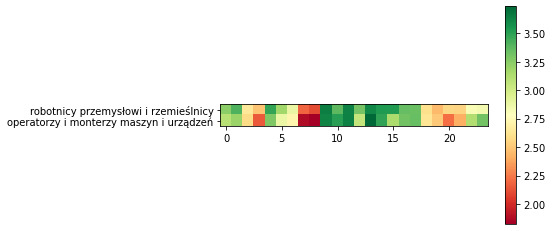

In [9]:
clustered_boss = get_clusters(4, boss_to_competencies)
show_clusters(clustered_boss)